In [149]:
import pandas as pd

In [150]:
df = pd.read_csv('Gas_Sensors_Measurements_value.csv')

In [151]:
df

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,0,555,515,377,338,666,451,416,0,0_NoGas
1,1,555,516,377,339,666,451,416,0,1_NoGas
2,2,556,517,376,337,666,451,416,0,2_NoGas
3,3,556,516,376,336,665,451,416,0,3_NoGas
4,4,556,516,376,337,665,451,416,0,4_NoGas
...,...,...,...,...,...,...,...,...,...,...
6355,1595,658,445,455,414,491,321,436,3,1595_Mixture
6356,1596,650,444,451,411,486,317,431,3,1596_Mixture
6357,1597,630,443,446,407,474,312,429,3,1597_Mixture
6358,1598,632,443,444,405,471,309,430,3,1598_Mixture


In [152]:
# get unique values of the column gas
df['Gas'].unique()
# count
df['Gas'].value_counts()

Gas
0    1590
1    1590
2    1590
3    1590
Name: count, dtype: int64

In [153]:
data = df.drop(['Serial Number','MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ8', 'Corresponding Image Name'], axis=1)

In [154]:
# standart scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Gas', axis=1))
scaled_features = scaler.transform(data.drop('Gas', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
df_feat.head()


,MQ7,MQ135
0,1.206330,-0.007555
1,1.206330,-0.007555
2,1.206330,-0.007555
3,1.194279,-0.007555
4,1.194279,-0.007555


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Gas'], test_size=0.30)


In [156]:
# y_train, y_test to labelencoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

# show le classes name
# le.classes_


In [157]:
# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))

# BatchNormalization
model.add(BatchNormalization())

model.add(Dense(units=4,activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test), verbose=1)


Epoch 1/25


140/140 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.7657 - val_loss: 0.8769 - val_accuracy: 0.8239
Epoch 2/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8495 - val_loss: 0.6097 - val_accuracy: 0.8381
Epoch 3/25
140/140 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8697 - val_loss: 0.4154 - val_accuracy: 0.8548
Epoch 4/25
140/140 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8794 - val_loss: 0.3197 - val_accuracy: 0.8784
Epoch 5/25
140/140 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8783 - val_loss: 0.2773 - val_accuracy: 0.8894
Epoch 6/25
140/140 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8789 - val_loss: 0.2679 - val_accuracy: 0.8915
Epoch 7/25
140/140 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.8875 - val_loss: 0.2524 - val_accuracy: 0.9030
Epoch 8/25
140/14

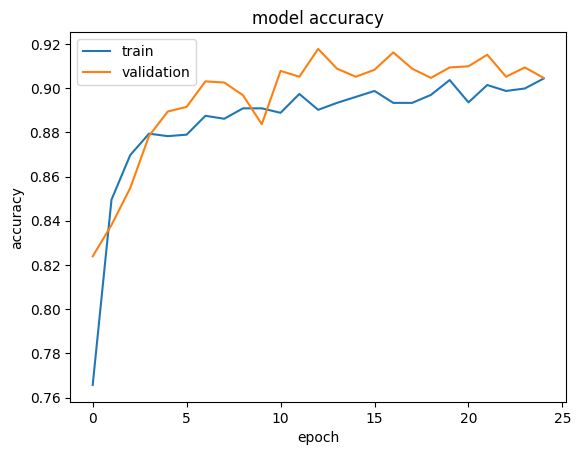

In [158]:
# hitory plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()


In [159]:
model.save('gas.h5')

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [160]:
import tensorflow as tf
model = tf.keras.models.load_model('gas.h5')

In [200]:
df = pd.read_csv('gas_testing.csv')
# model.predict()
data_y = df['Gas']
data = df.drop(['Serial Number','MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ8', 'Corresponding Image Name', 'Gas'], axis=1)

In [170]:
data

,MQ7,MQ135
0,408,382
1,412,383
2,415,384
3,411,383
4,408,383
5,406,382
6,408,382
7,411,384
8,413,386
9,419,389


In [174]:
scaled_features = scaler.transform(data)
df_feat = pd.DataFrame(scaled_features, columns=data.columns)
df_feat.head()

,MQ7,MQ135
0,-1.902809,-0.451588
1,-1.854605,-0.438529
2,-1.818453,-0.425469
3,-1.866656,-0.438529
4,-1.902809,-0.438529


In [202]:

pred = model.predict(df_feat)
kelas = ['No Gas', 'Perfume', 'Smoke', 'Mixture']
hasil = []
for i in pred:
  print(kelas[i.argmax()])
  hasil.append(i.argmax())
  



2/2 [==============================] - 0s 2ms/step
Mixture
Mixture
Mixture
Mixture
Mixture
Mixture
Mixture
Mixture
Mixture
Mixture
Smoke
Smoke
Smoke
Smoke
Smoke
Smoke
Smoke
Smoke
Smoke
Smoke
No Gas
Perfume
Perfume
Perfume
Perfume
Perfume
Perfume
Perfume
Perfume
Perfume
No Gas
No Gas
No Gas
No Gas
No Gas
No Gas
No Gas
No Gas
No Gas
No Gas


In [203]:
hasil

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [204]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(data_y, hasil)
cm

array([[10,  0,  0,  0],
       [ 1,  9,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 10]])

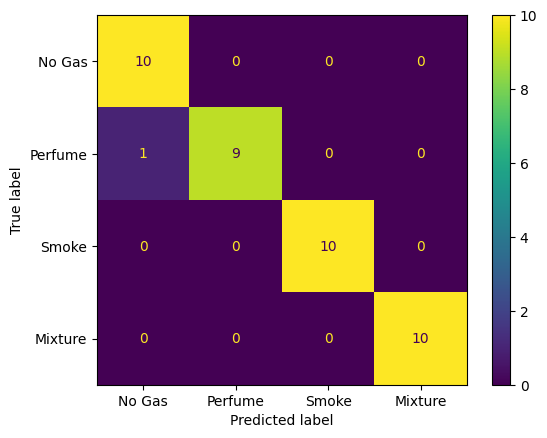

In [205]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Gas', 'Perfume', 'Smoke', 'Mixture'])
disp.plot()
plt.show()

In [207]:
import numpy as np
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [212]:
print("Specificity or true negative rate : \n" , TNR)
print("Sensitivity, hit rate, recall, or true positive rate : \n" , TPR)
print("Fall out or false positive rate : \n" , FPR)
print("False negative rate : \n" , FNR)
print("Precision or positive predictive value : \n" , PPV)
print("Negative predictive value : \n" , NPV)
print("False discovery rate : \n" , FDR)
print("Overall accuracy : \n" , ACC)


Specificity or true negative rate : 
 [0.96666667 1.         1.         1.        ]
Sensitivity, hit rate, recall, or true positive rate : 
 [1.  0.9 1.  1. ]
Fall out or false positive rate : 
 [0.03333333 0.         0.         0.        ]
False negative rate : 
 [0.  0.1 0.  0. ]
Precision or positive predictive value : 
 [0.90909091 1.         1.         1.        ]
Negative predictive value : 
 [1.         0.96774194 1.         1.        ]
False discovery rate : 
 [0.09090909 0.         0.         0.        ]
Overall accuracy : 
 [0.975 0.975 1.    1.   ]
